Remark: If you see a ✏️, you should work out the solution steps independently.

In [3]:
using SymPy
using Plots
theme(:vibrant)
default(framestyle=:box)
using LaTeXStrings

┌ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1278
┌ Info: Installing sympy via the Conda sympy package...
└ @ PyCall C:\Users\Anaconda\.julia\packages\PyCall\BcTLp\src\PyCall.jl:708
┌ Info: Running `conda install -y sympy` in root environment
└ @ Conda C:\Users\Anaconda\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Anaconda\.julia\conda\3

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fastcache-1.1.0            |   py38he774522_0          31 KB
    mpmath-1.1.0               |           py38_0         777 KB
    sympy-1.6.2                |           py38_0         8.6 MB
    ------------------------------------------------------------
                                           Total:         9.4 MB

The following NEW packages will be INSTALLED:

  fastcache          pkgs/main/win-64::fastcache-1.1.0-py38he774522_0
  mpmath             pkgs/main/win-64::mpmath-1.1.0-py38_0
  sympy              pkgs/main/win-64::sympy-1.6.2-py38_0



fastcache-1.1.0      | 31 KB     | ########## | 100% 
mpmath-1.1.0         | 777 KB    | ########## | 100% 
sympy-1.6.2          | 8.6 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1278


# Introduction to point sources

To represent a source distribution $\rho(\mathbf{x})$ we will first work with point sources.

Drawback: Point sources represent a physical property but assign it to an infinitely small volume.
This causes problems, because the integration of the Poisson equation is not feasible in the classical sens ("area under the curve").

We need a generalized function which has the important property of providing a finite integral value for unbounded integrands.

A function with all these feature is the *Dirac delta distribution*.

As an example, we consider a point mass with $m_{\epsilon}=1$ distributed over a sphere of radius $\epsilon .$ In the $\mathbb{R}^{3}$ the density is
$$
\rho_{\epsilon}=\frac{m_{\epsilon}}{V_{\epsilon}}=\frac{3}{4 \pi \epsilon^{3}}
$$

With the function
$$
h_{\epsilon}(\mathbf{x})=\left\{\begin{array}{ll}
=\dfrac{3}{4 \pi \epsilon^{3}} & \text { if }\|\mathbf{x}\|<\epsilon, \mathbf{x} \in G_{1} \\
=0 & \text { if }\|\mathbf{x}\| > \epsilon, \mathbf{x} \in G_{1}
\end{array}\right.
$$
we can describe the density of this sphere. It amounts to
$$
\rho(\mathbf{x})=m \, h_{\epsilon}(\mathbf{x})
$$

If we consider the limit of the sequence of functions $h_{\epsilon}(\mathrm{x})$ for $\epsilon \rightarrow 0,$ then
$$
\delta(\mathbf{x})=\lim _{\epsilon \rightarrow 0} h_{\epsilon}(\mathbf{x})=\left\{\begin{array}{ll}
\infty & \text { if } \mathbf{x}=0 \\
0 & \text { if } \mathbf{x} \neq 0
\end{array}\right.
$$

For all continuous functions $\phi(\mathrm{x})$ there holds in the limit
$$
\lim _{\epsilon \rightarrow 0} \int \phi(\mathbf{x}) h_{\epsilon}(\mathbf{x}) d \mathbf{x} \rightarrow\langle\phi, \delta\rangle=\phi(0)
$$

Note that $\langle\phi, \delta\rangle$ is the inner product of the function $\phi$ and the Delta distribution $\delta$.

Since a Delta function is not a function in the classical sense, the integral is a *heuristic* formalism:

**The value of the integral can be obtained by evaluating the function $\phi$ where the argument of the Delta function is zero.** 

In the following we illustrate these properties.
To this end, we use `SymPy`, a `Julia` package for symbolic mathematics.

First, we define a symbolic variable `x` and the continuous function `Φ(x)`.

In [7]:
x = Sym("x")
Ф(x) = (2 + cos(x)) * (x -1)


Ф (generic function with 1 method)

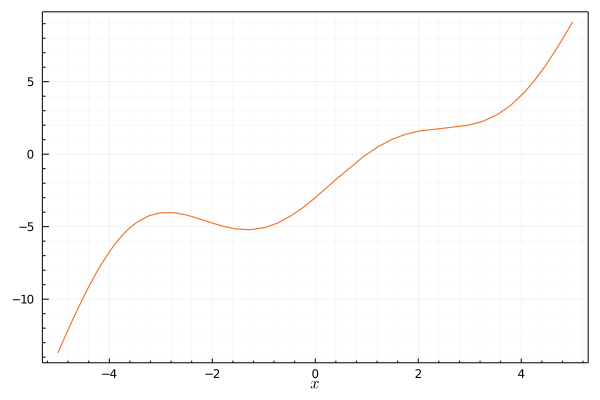

In [8]:
plot(Ф, label ="", xlabel = L"x")

Next, we evaluate the integral

$$
\int\limits_{-\infty}^\infty \Phi(x) \delta(x) \,dx
$$

and obtain the value of $\Phi(x)$ at $x=0$ as expected:

In [10]:
integrate(DiracDelta(x) *Ф(x), (x, -Inf, Inf))

-3

## Potential of an electrostatic point charge

Recall the radially symmetric *electrostatic potential* of a charge density $\rho_E(r) = Q \delta(r)$.

From Maxwells equations it follows that $\nabla \cdot \mathbf D = \rho_E$ and $\mathbf D = \varepsilon \mathbf E$.

Further, in the case of electrostatics, it holds that the electric field is curl-free or irrotational, i.e., $\nabla \times \mathbf E = 0$.

We can therefore write the electric field as the gradient of a scalar function $U$, such that
$$
\mathbf E = -\nabla U.
$$
This function is referred to as a potential.

The potential
$$
U(r) = \frac{Q}{4 \pi \varepsilon r}
$$
is a solution of the Poisson equation
$$
\Delta U = -\frac{\rho_E}{\varepsilon}.
$$

Remark: The direction of the electric field lines is defined such that the field vector points away from a positive charge. 

In the following, we demonstrate how to solve the Poisson equation using `SymPy`.

We introduce the symbolic function `U` and the symbolic variables `r`, `epsilon` and `Q`.

In [11]:
U = SymFunction("U")
r, epsilon, Q = Sym("r epsilon Q") 

(r, epsilon, Q)

The radial part of the Laplace equation in spherical coordinates is
$$
\Delta U = \frac{d^2 U}{d r^2} + \frac{2}{r} \frac{dU}{dr} = 0.
$$

This equation can be written as a symbolic expression.
The prime (`'`) denotes differentiation with respect to the argument.

In [13]:
ΔU = U''(r) + 2 / r * U'(r)

              d       
  2         2*--(U(r))
 d            dr      
---(U(r)) + ----------
  2             r     
dr                    

The function `dsolve` solves differential equations, here the solution `U(r)` of `ΔU` is desired.
Dirichlet (`U`) and Neumann (`U'`) conditions can be imposed using expressions following the keyword `ics`.
In our example, we impose
* `(U, Inf, 0)`: $U(r) \to 0$ for $r \to \infty$,
* `(U', 1, -Q / 4 / pi / epsilon)`: $U'(r) = -\dfrac{Q}{4 \pi \varepsilon}$ for $r = 1$.         ✏️

In [14]:
dsolve(ΔU, U(r), ics=((U, Inf, 0),(U', 1, -Q / 4 / pi / epsilon)))

             Q       
U(r) = --------------
       4*pi*epsilon*r

## Derivation of the Poisson equation for gravity

It is required that the Poisson equation for gravity has the same structure as in the electrostatic case.

We make the following assumptions:

* There is a mass density $\rho_M = m \delta(r)$ distributed in the origin
* The gravity potential $V$ is a solution to the Poisson equation $\Delta V = -\gamma \rho_M$
* The coefficient $\gamma$ is to be determined

We make the ansatz
$$
\Delta V = -\gamma \rho_M.
$$

The Laplacian of the potential, $\Delta V$, can also be expressed by the divergence of its gradient, i.e., $\Delta V = \nabla \cdot \nabla V$.

The gradient of the potential provides the gravitational attraction $\mathbf g = - \nabla V$.
With $\hat{\mathbf r} = \dfrac{\mathbf r}{r}$ we denote a unit vector in radial direction.

We set $\mathbf g = -g(r) \hat{\mathbf r}$, which means that a test mass will experience an acceleration towards the mass causing the potential.

To solve Poissons equation we have to integrate over a volume containing the mass density $\rho_M$:

$$
-\int \nabla \cdot \nabla V \, d^3 r = \int \nabla \cdot \mathbf g \, d^3 r = 
\gamma m \int \delta(r) \, d^3 r
$$

We apply Gauss's theorem and obtain
$$
\oint \mathbf g \cdot d\mathbf A = \gamma m
$$
with $d\mathbf A = \hat{\mathbf r}dA = \hat{\mathbf r} \, r^2 \sin\theta d\theta d\phi$ the surface element. 

It follows that ✏️
$$
\oint \mathbf g \cdot d\mathbf A = -g(r) \int dA = -4 \pi r^2 g(r) = \gamma m.
$$

As an intermediate result we get
$$
g(r) = -\dfrac{\gamma m}{4 \pi r^2}.
$$

It remains to determine $\gamma$.

From *Newton's law of universal gravity* we know that the force on a mass $m'$ in a gravitational field caused by the mass $m$ is
$$
F(r) = f \dfrac{m m'}{r^2}.
$$

$f = (6{.}674\,30\pm 0{.}000\,15) \times 10^{-11}\,\mathrm{\frac{m^3}{kg \cdot s^2}}$ is the gravitational constant.

By inspection, we see that
$$
g(r) = f \dfrac{m}{r^2},
$$
$$
V(r) = -f\dfrac{m}{r}
$$
and
$$
\gamma = -4 \pi f.
$$

The Poisson equation of gravity is therefore
$$
\Delta V = 4 \pi f \rho_M,
$$

The direction of the gravitational field points towards the mass causing the potential.

![Earth](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Gravitymacroscopic.svg/200px-Gravitymacroscopic.svg.png "Gravity at a macroscopic level")

(From Wikimedia Commons, the free media repository)

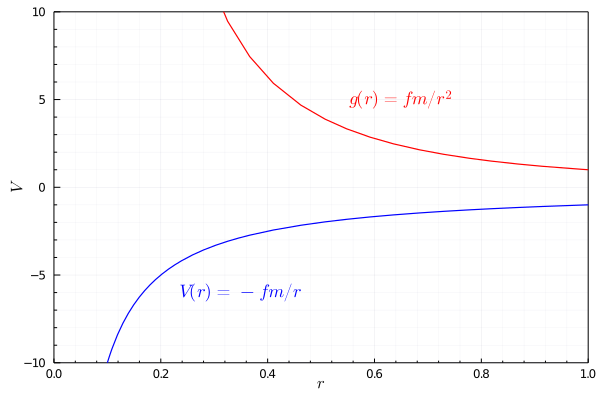

In [15]:
plot(-1/r, 1e-1, 1, label="", xlabel=L"r", ylabel=L"V", 
    color=:blue, framestyle = :box)
plot!(1/r^2, 1e-1, 1, label="", color=:red)
xlims!((0, 1))
ylims!((-10, 10))
annotate!(0.35, -6, text(latexstring("V(r) = -fm/r"), 12, color=:blue))
annotate!(0.65, 5, text(latexstring("g(r) = f m / r^2"), 12, color=:red))